In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import os

In [169]:
current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/ConsumoxCo2.csv")
data = pd.read_csv(path_file)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [171]:
selection = data[["ENGINESIZE", "CO2EMISSIONS"]]
selection.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


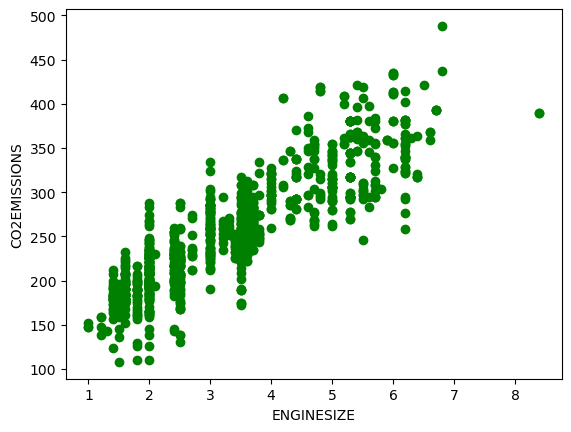

In [172]:
plt.scatter(selection["ENGINESIZE"], \
            selection["CO2EMISSIONS"], color = "green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

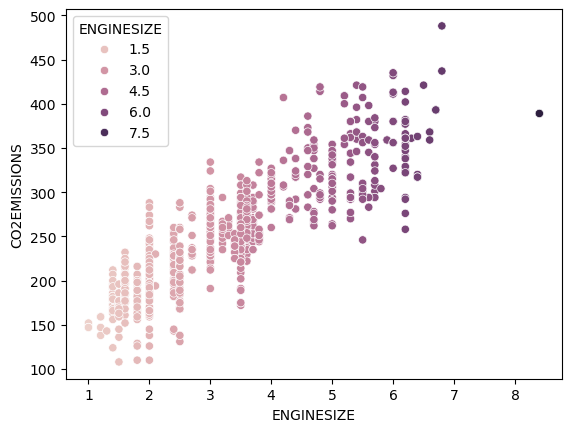

In [173]:
ax = sns.scatterplot(x="ENGINESIZE", \
                     y="CO2EMISSIONS", \
                     data=selection, \
                     hue = "ENGINESIZE")

In [174]:
# Divisão 80% treino e 20% teste
train1 = selection[:(int((len(selection)*0.8)))]
test1 = selection[(int((len(selection)*0.8))):]

In [175]:
# Divisão 75% treino e 25% teste
train2 = selection[:(int((len(selection)*0.75)))]
test2 = selection[(int((len(selection)*0.75))):]

In [176]:
# Divisão 70% treino e 30% teste
train3 = selection[:(int((len(selection)*0.7)))]
test3 = selection[(int((len(selection)*0.7))):]

In [177]:
# Verificando os tamanhos
print(f"80/20 -> Treino: {len(train1)}, Teste: {len(test1)}")
print(f"75/25 -> Treino: {len(train2)}, Teste: {len(test2)}")
print(f"70/30 -> Treino: {len(train3)}, Teste: {len(test3)}")

80/20 -> Treino: 853, Teste: 214
75/25 -> Treino: 800, Teste: 267
70/30 -> Treino: 746, Teste: 321


In [178]:
reg = linear_model.LinearRegression()
train_x1 = np.array(train1[["ENGINESIZE"]])
train_y1 = np.array(train1[["CO2EMISSIONS"]])
reg.fit(train_x1, train_y1)

LinearRegression()

In [179]:
reg = linear_model.LinearRegression()
train_x2 = np.array(train2[["ENGINESIZE"]])
train_y2 = np.array(train2[["CO2EMISSIONS"]])
reg.fit(train_x2, train_y2)

LinearRegression()

In [180]:
reg = linear_model.LinearRegression()
train_x3 = np.array(train3[["ENGINESIZE"]])
train_y3 = np.array(train3[["CO2EMISSIONS"]])
reg.fit(train_x3, train_y3)

LinearRegression()

In [181]:
print("Train Accuracy 80/20: ", reg.score(train_x1, train_y1))
print("Train Accuracy 75/25: ", reg.score(train_x2, train_y2))
print("Train Accuracy 70/30: ", reg.score(train_x3, train_y3))

Train Accuracy 80/20:  0.7564194318056839
Train Accuracy 75/25:  0.7534250598970822
Train Accuracy 70/30:  0.7516053313340927


In [182]:
print(f"80/20 -> Coefficient: {reg.coef_}, Intercept: {reg.intercept_}")

80/20 -> Coefficient: [[39.24284192]], Intercept: [125.79093758]


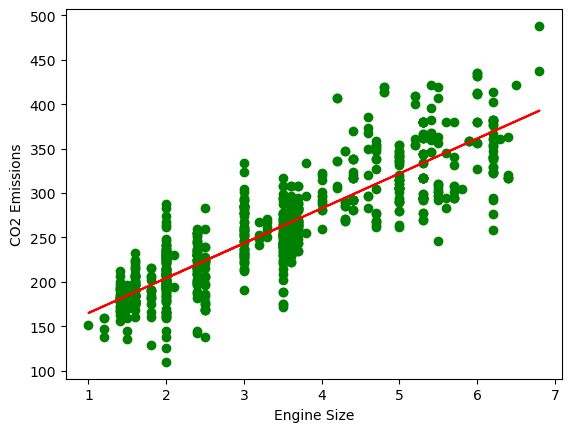

In [183]:
plt.scatter(train1["ENGINESIZE"], \
            train1["CO2EMISSIONS"], color = "green")
plt.plot(train_x1, reg.coef_ * train_x1 + reg.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [184]:
def reg_pred(input_features, intercept, slope):
    pred = input_features * slope + intercept

    return pred

In [185]:
n_eng_size = 1.6
emission_estim = reg_pred(n_eng_size, reg.intercept_[0], reg.coef_[0][0])
print("Emissão de CO2 estimada para um carro de motor", n_eng_size, "é: ",emission_estim)

Emissão de CO2 estimada para um carro de motor 1.6 é:  188.5794846492938


In [186]:
from sklearn.metrics import r2_score

# 80/20, 75/25, 70/30
datasets = [train1, train2, train3]

for i, train in enumerate(datasets, start=1):
    train_x = np.array(train[["ENGINESIZE"]])
    train_y = np.array(train[["CO2EMISSIONS"]])
    train_y_ = reg.predict(train_x)
    
    print(f'Resultados para train{i}:')
    print('Erro absoluto (Mean absolute error): %.2f' % np.mean(np.absolute(train_y_ - train_y)))
    print('MSE (Mean sum of squares): %.2f' % np.mean((train_y_ - train_y) ** 2))
    print('Score R2: %.2f' % r2_score(train_y_, train_y))
    print(f"Train score {i}: ", reg.score(train_x, train_y))
    print('---')

Resultados para train1:
Erro absoluto (Mean absolute error): 24.12
MSE (Mean sum of squares): 997.89
Score R2: 0.69
Train score 1:  0.7564194318056839
---
Resultados para train2:
Erro absoluto (Mean absolute error): 24.56
MSE (Mean sum of squares): 1019.33
Score R2: 0.68
Train score 2:  0.7534250598970822
---
Resultados para train3:
Erro absoluto (Mean absolute error): 24.49
MSE (Mean sum of squares): 1010.97
Score R2: 0.67
Train score 3:  0.7516053313340927
---


In [187]:
# 80/20, 75/25, 70/30
datasets = [test1, test2, test3]

for i, test in enumerate(datasets, start=1):
    test_x = np.array(test[["ENGINESIZE"]])
    test_y = np.array(test[["CO2EMISSIONS"]])
    test_y_ = reg.predict(test_x)

    print(f'Resultados para test{i}:')
    print('Erro absoluto (Mean absolute error): %.2f' % np.mean(np.absolute(test_y_ - test_y)))
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(test_y, test_y_)
    print(f"MAE: {mae:.2f}")
    print('MSE (Mean sum of squares): %.2f' % np.mean((test_y_ - test_y) ** 2))
    mse = mean_squared_error(test_y, test_y_)
    print(f"Mean squared error: {mse:.2f}")
    print('Score R2: %.2f' % r2_score(test_y_, test_y))
    print(f"Test score {i}: ", reg.score(test_x, test_y))
    print('---')

Resultados para test1:
Erro absoluto (Mean absolute error): 20.54
MAE: 20.54
MSE (Mean sum of squares): 744.75
Mean squared error: 744.75
Score R2: 0.72
Test score 1:  0.7866226597841557
---
Resultados para test2:
Erro absoluto (Mean absolute error): 19.91
MAE: 19.91
MSE (Mean sum of squares): 730.75
Mean squared error: 730.75
Score R2: 0.71
Test score 2:  0.7781261203409436
---
Resultados para test3:
Erro absoluto (Mean absolute error): 20.86
MAE: 20.86
MSE (Mean sum of squares): 798.72
Mean squared error: 798.72
Score R2: 0.73
Test score 3:  0.7792106705575523
---
